In [96]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/AI_LAB/circles_binary_classification.csv")

# Getting the Feel of Data
- describe
- info
- head

In [97]:
data.describe()

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


In [98]:
data.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# Data cleaing
Here all the 1000 given values are not-null hence **data preparation** is not required

# General Data Visualization

- Just plotting the data since it is plottable.
- x1, x2, label(0,1)

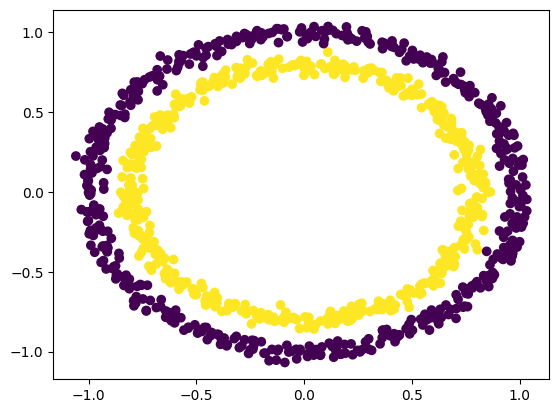

In [100]:
import matplotlib.pyplot as plt
plt.scatter(data['X1'], data['X2'], c=data['label'])

In [101]:
X = data[["X1", "X2"]].values
Y = data["label"].values

print(X.shape, Y.shape)

(1000, 2) (1000,)


In [102]:
import torch

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [103]:
print(X[:5], Y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])


In [104]:
# Split data into train and test sets
# sklearn.model_selection
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

print(len(X_train), len(X_test), len(y_train), len(y_test))

800 200 800 200


In [105]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cpu


In [106]:
class Modelv0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

class Modelv1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=15)
        self.layer2 = nn.Linear(in_features=15, out_features=15)
        self.layer3 = nn.Linear(in_features=15, out_features=1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

class Modelv2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=64)
        self.layer2 = nn.Linear(in_features=64, out_features=64)
        self.layer3 = nn.Linear(in_features=64, out_features=10)
        self.layer4 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # Adding Activation function

    def forward(self, x):
        return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

ClassificationModelv0 = Modelv0().to(device)
ClassificationModelv1 = Modelv1().to(device)
ClassificationModelv2 = Modelv2().to(device)

print(ClassificationModelv0)
print(ClassificationModelv1)
print(ClassificationModelv2)

Modelv0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)
Modelv1(
  (layer1): Linear(in_features=2, out_features=15, bias=True)
  (layer2): Linear(in_features=15, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=1, bias=True)
)
Modelv2(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [107]:
untrained_pred = ClassificationModelv0(X_test.to(device))

print("="*50)
print("layers 2(in), 5, 1(out)")
print("="*50)
print(f"Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}\n")

untrained_pred = ClassificationModelv1(X_test.to(device))

print("="*50)
print("layers 2(in), 15, 15, 1(out)")
print("="*50)
print(f"Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}\n")

untrained_pred = ClassificationModelv2(X_test.to(device))

print("="*50)
print("layers 2(in), 64, 64, 10, 1(out) with activation")
print("="*50)
print(f"Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}\n")

layers 2(in), 5, 1(out)
Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
layers 2(in), 15, 15, 1(out)
Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1108],
        [ 0.0746],
        [ 0.1096],
        [ 0.1115],
        [-0.0425],
        [-0.0634],
        [-0.0445],
        [-0.0772],
        [ 0.1160],
        [ 0.0705]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
layers 2(in), 64, 64, 10, 1(out) with activation
Length of predictions: 200, Shape: torch.Size([200, 1]

In [108]:
#first 5 prediction
y_pred_labels_v0 = torch.round(torch.sigmoid(ClassificationModelv0(X_test.to(device))[:5]))
y_pred_labels_v1 = torch.round(torch.sigmoid(ClassificationModelv1(X_test.to(device))[:5]))
y_pred_labels_v2 = torch.round(torch.sigmoid(ClassificationModelv2(X_test.to(device))[:5]))

print(f"Predictions model 0: {y_pred_labels_v0}")
print(f"Predictions model 1: {y_pred_labels_v1}")
print(f"Predictions model 2: {y_pred_labels_v2}")

Predictions model 0: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
Predictions model 1: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)
Predictions model 2: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


In [109]:
#actual value
print(y_test[:5])

tensor([1., 0., 1., 0., 1.])


In [110]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer0 = torch.optim.SGD(params=ClassificationModelv0.parameters(),
                            lr=0.2)
optimizer1 = torch.optim.SGD(params=ClassificationModelv1.parameters(),
                            lr=0.2)
optimizer2 = torch.optim.SGD(params=ClassificationModelv2.parameters(),
                            lr=0.2)

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [111]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1280

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

def train_and_test_loop(
    model: nn.Module,
    epochs: int,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_test: torch.Tensor,
    y_test: torch.Tensor,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer
):
    # lists
    loss_list = []
    acc_list = []
    test_losses = []
    test_acc_list = []



    # Build training and evaluation loop
    for epoch in range(epochs):
        ### Training
        model.train()

        # 1. Forward pass (model outputs raw logits)
        y_logits = model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
        y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

        # 2. Calculate loss/accuracy
        # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
        #                y_train)
        loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                    y_train)
        acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            # 2. Caculate loss/accuracy
            test_loss = loss_fn(test_logits,
                                y_test)
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)


        loss_list.append(loss.item())
        acc_list.append(acc)
        test_losses.append(test_loss.item())
        test_acc_list.append(test_acc)

        # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

    return loss_list, acc_list, test_losses, test_acc_list

In [112]:
linewidth = 100

print("="*linewidth)
print("layers 2(in), 5, 1(out)")
print("="*linewidth)
train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=ClassificationModelv0,
    epochs=120,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer0
)


print("="*linewidth)
print("layers 2(in), 15, 15, 1(out)")
print("="*linewidth)
train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=ClassificationModelv1,
    epochs=1000,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer1
)

print("="*linewidth)
print("layers 2(in), 64, 64, 10, 1(out) with activation")
print("="*linewidth)
train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=ClassificationModelv2,
    epochs=1500,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer2
)

layers 2(in), 5, 1(out)
Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69703, Test acc: 50.00%
Epoch: 100 | Loss: 0.69299, Accuracy: 51.50% | Test loss: 0.69503, Test acc: 46.50%
layers 2(in), 15, 15, 1(out)
Epoch: 0 | Loss: 0.69423, Accuracy: 50.25% | Test loss: 0.69361, Test acc: 56.00%
Epoch: 100 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69456, Test acc: 46.00%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298,

# Helper function
Taken from the povided resources.
Helper function for Matplotlib to plot the decision boundry.

In [113]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

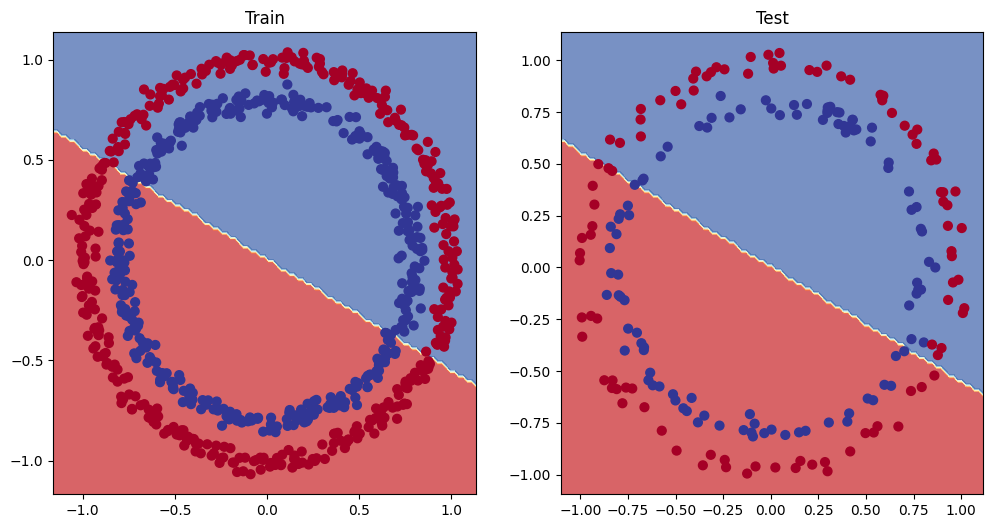

In [114]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(ClassificationModelv0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(ClassificationModelv0, X_test, y_test)


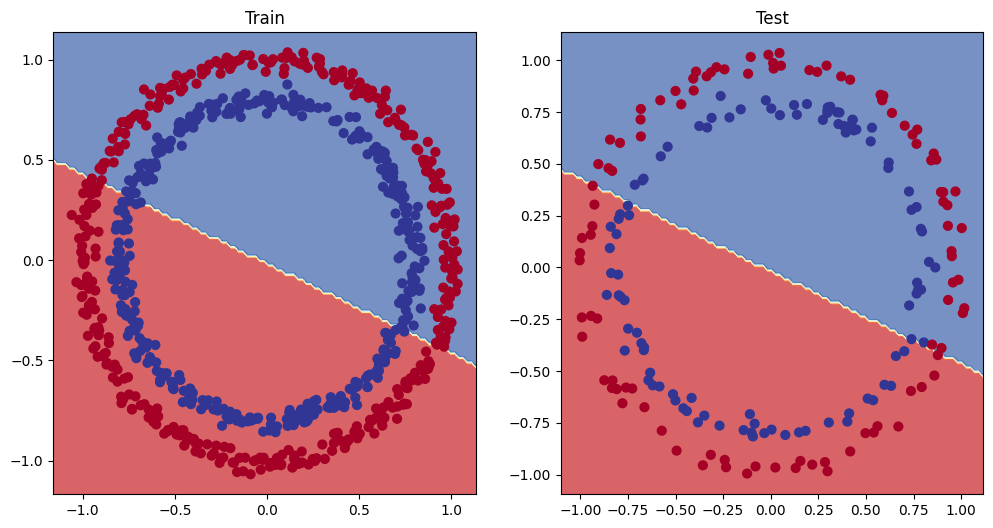

In [115]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(ClassificationModelv1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(ClassificationModelv1, X_test, y_test)


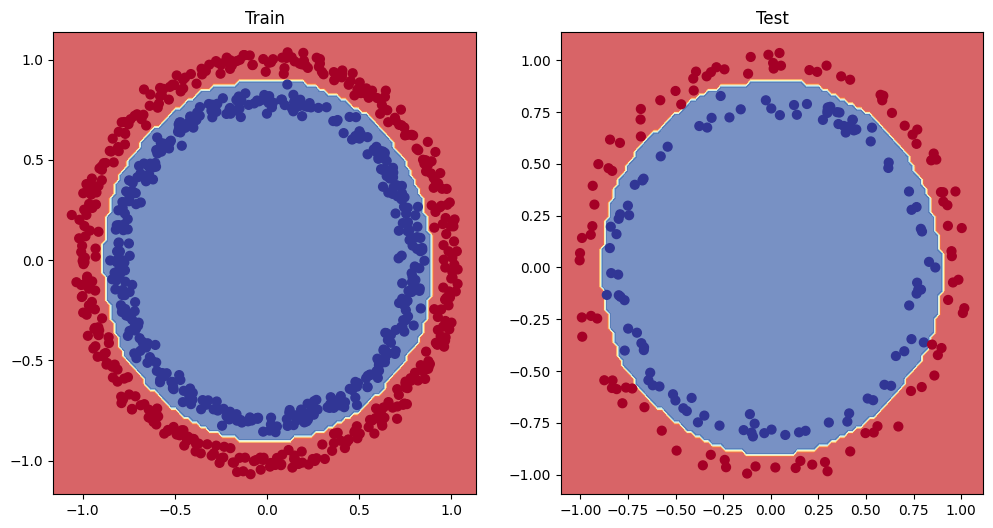

In [116]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(ClassificationModelv2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(ClassificationModelv2, X_test, y_test)


# Discussion and conclusion

## Background
We are using learning rates of 0.2 with 80%, 20% test train split. We are using Stochastic Gradient Descent.

## Model V0
As we can see from the plotted graph the neural network with just 1 hidden layer is simply incapable of seperating the non linear data without a activation function and even though the traning epoches is capped at 120 further processing would yield the same output.

## Model V1
Th model V1 at first glance may seem more capable due to the architecture of the model 2x15x15x1 but this now shows that multiple network connected without a activation function can be simply replaced with a single network.
This shows that the without activation multiple layers of NN collapse into 1 layer. And same problem of linear model incapable of distinguishing non linear data arises.

## Model V2
This is the best implementation. It has proper distribution if 2x64x64x10x1
layers each with activation. Notice how the Activation function keeps the layers seperated and doesn't let it collapse into one layer. This helps the NN learn multiple non linear features. It is trained for 1500 epoches


### Visualization
The Activation function can be thought as creating "folds" in high dimension planes. In our case since we have 2 input features so its a 2d plane being scaled and folded.

# Conclusion
The Only non liner model is the V2 which correctly classifies our input data
